In [1]:
"Read a graph in gfa format and compute some stats"
from typing import Union
from pathlib import Path
from collections import Counter

class GFAStats:

    def __call__(self, path_gfa: Union[str,Path]):
        nodes_by_id = self.get_nodes(path_gfa)
        lens = [len(label) for label in nodes_by_id.values()]
        return lens
        
    def get_nodes(self, path_gfa):
        nodes = dict()
        with open(path_gfa, "r") as fp:
            for line in fp.readlines():
                line = line.replace("\n","")
                line_split = line.split("\t")
                
                if line_split[0] == "S": 
                    id_node = line_split[1]
                    label   = line_split[2]
                    nodes[id_node] = label

        return nodes

In [2]:
PATH_GFA="/home/avila/pangeblocks/experiment/gfa/toyexample.gfa"
path_gfa_pandora = "../experiment/output-pandora/GC00002971_r1_r1_1.gfa"
path_gfa_pggb = "../experiment/output-pggb/GC00002971_r1_r1_1.fa.gz.f38ac34.417fcdf.5180c7d.smooth.final.gfa"

gfastats = GFAStats()

lens_pandora = gfastats(path_gfa=path_gfa_pandora)
lens_pggb = gfastats(path_gfa=path_gfa_pggb)

In [9]:
print(f"Nodes Pandora: {len(lens_pandora)}")
print(f"Nodes pggb: {len(lens_pggb)}")

Nodes Pandora: 2687
Nodes pggb: 3013


In [3]:
import seaborn as sns

<AxesSubplot: ylabel='Count'>

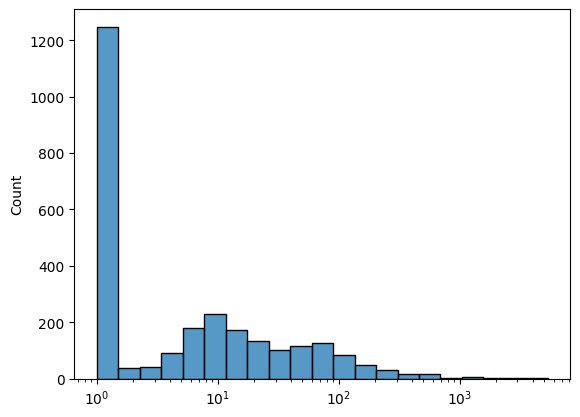

In [10]:
sns.histplot(lens_pandora, log_scale=True)

<AxesSubplot: ylabel='Count'>

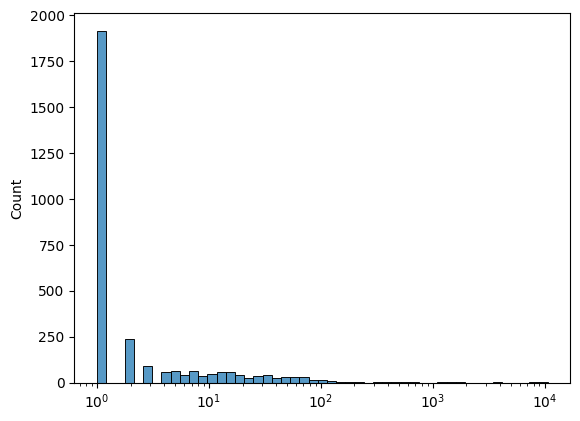

In [11]:
sns.histplot(lens_pggb, log_scale=True)

In [12]:
import pandas as pd
pd.DataFrame({"lens_pandora": lens_pandora}).describe()

,lens_pandora
count,2687.000000
mean,34.100112
std,157.548896
min,1.000000
25%,1.000000
50%,4.000000
75%,19.000000
max,5350.000000


In [13]:
pd.DataFrame({"lens_pggb": lens_pggb}).describe()

,lens_pggb
count,3013.000000
mean,30.877863
std,386.875377
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,10695.000000
